<a href="https://colab.research.google.com/github/rajavarshinic/Tree_Species_Classification/blob/main/tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Tree_Species_Dataset.zip to Tree_Species_Dataset.zip


In [4]:
import zipfile
import os

# Unzip the uploaded file into 'tree_data' folder
with zipfile.ZipFile("Tree_Species_Dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/tree_data")

# Confirm path
dataset_path = "/content/tree_data/Tree_Species_Dataset"
print("Unzipped at:", dataset_path)


Unzipped at: /content/tree_data/Tree_Species_Dataset


In [5]:
import os

# List subdirectories (tree species)
species_dirs = os.listdir(dataset_path)
species_dirs = [d for d in species_dirs if os.path.isdir(os.path.join(dataset_path, d))]
print("Tree Species Classes:", species_dirs)
print("Total classes:", len(species_dirs))


Tree Species Classes: ['.git', 'other', 'garmalo', 'bamboo', 'neem', 'nilgiri', 'sugarcane', 'gulmohor', 'gunda', 'bili', 'khajur', 'jamun', 'champa', 'amla', 'pipal', 'mango', 'coconut', 'pilikaren', 'kesudo', 'banyan', 'cactus', 'kanchan', 'shirish', 'simlo', 'asopalav', 'vad', 'saptaparni', 'babul', 'sitafal', 'sonmahor', 'motichanoti']
Total classes: 31


In [20]:
extract_path = os.path.join(extract_path, 'Tree_Species_Dataset')

Top-level directory inside tree_data: ['Tree_Species_Dataset']
Tree Species Classes: ['.git', 'amla', 'asopalav', 'babul', 'bamboo', 'banyan', 'bili', 'cactus', 'champa', 'coconut', 'garmalo', 'gulmohor', 'gunda', 'jamun', 'kanchan', 'kesudo', 'khajur', 'mango', 'motichanoti', 'neem', 'nilgiri', 'other', 'pilikaren', 'pipal', 'saptaparni', 'shirish', 'simlo', 'sitafal', 'sonmahor', 'sugarcane', 'vad']
Total classes: 31


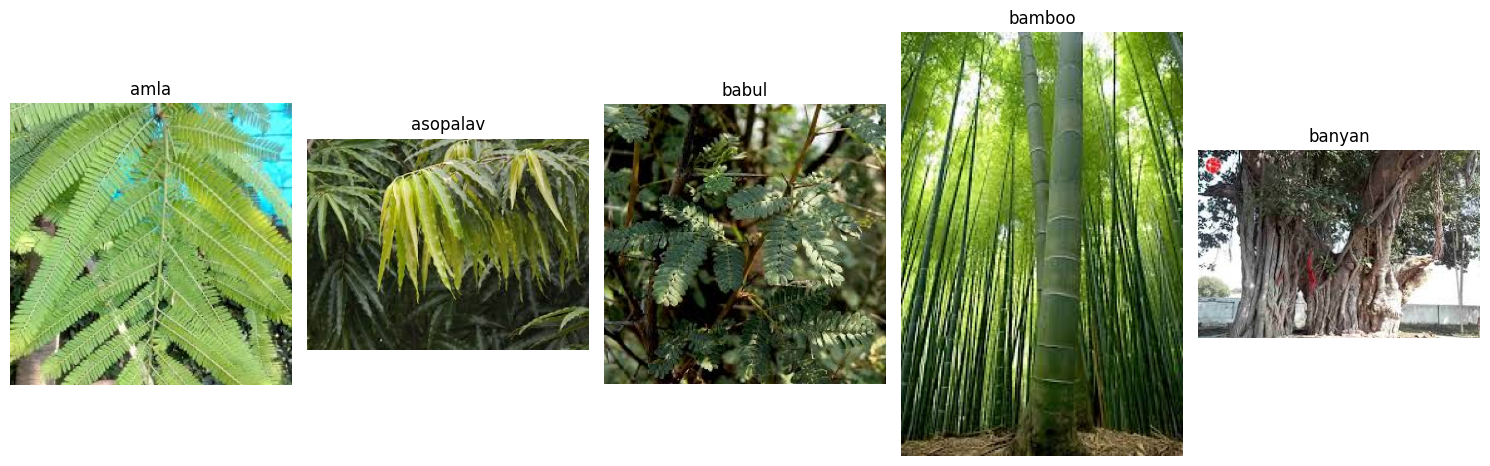

In [29]:
import zipfile
import os
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Step 1: Define your paths
zip_file = "/content/Tree_Species_Dataset.zip"
extract_path = "/content/tree_data"

# Step 2: Unzip the dataset
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_path)



# Step 3: Fix the path if nested inside one folder
# Let's check what folder was created inside 'tree_data'
top_dirs = os.listdir(extract_path)
print("Top-level directory inside tree_data:", top_dirs)

# If it's only one folder (like Tree_Species_Dataset), go inside it
if len(top_dirs) == 1:
    extract_path = os.path.join(extract_path, top_dirs[0])

# Step 4: List species folders
species_dirs = sorted(os.listdir(extract_path))
print("Tree Species Classes:", species_dirs)
print("Total classes:", len(species_dirs))

# Step 5: Display 5 sample images with labels
fig = plt.figure(figsize=(15, 5))
i = 1
for species in species_dirs:
    species_path = os.path.join(extract_path, species)
    if os.path.isdir(species_path):
        image_files = [f for f in os.listdir(species_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
        if image_files:
            img_path = os.path.join(species_path, image_files[0])
            img = mpimg.imread(img_path)
            ax = fig.add_subplot(1, 5, i)
            ax.imshow(img)
            ax.set_title(species)
            ax.axis('off')
            i += 1
        if i > 5:
            break
plt.tight_layout()
plt.show()
